In [ ]:
##importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
##Loading the Titanic dataset

In [ ]:
data = pd.read_csv("titanic_dataset.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##Setting Passenger_ID as the index Column

In [ ]:
data.set_index("PassengerId",inplace=True)

In [ ]:
data.isnull().sum() ##Checking for the null values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

##Preprocessing

In [ ]:
data["Embarked"].fillna("No value", inplace = True)

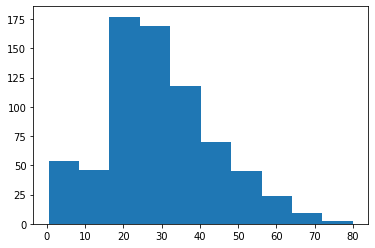

In [ ]:
plt.hist(data['Age'])
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
num_cols=data[['Age']]

In [ ]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean') ##Filling the missing values in Age with mean
imputer=imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)

In [ ]:
num_cols=pd.DataFrame(num_cols,columns=[['Age']])

In [ ]:
num_cols.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [ ]:
num_cols.index = np.arange(1, len(num_cols) + 1)

In [ ]:
num_cols.head()

,Age
1,22.0
2,38.0
3,26.0
4,35.0
5,35.0


In [ ]:
data.drop(['Age'],axis=1,inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S


In [ ]:
data=pd.concat([num_cols,data],axis=1) ##joining the num_cols with data

In [ ]:
data.drop(['Cabin'],axis=1,inplace=True)##Removing the cabin column since it has more null values

In [ ]:
data.isnull().sum()

(Age,)      0
Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [ ]:
data.head()

,"(Age,)",Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
1,22.0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
2,38.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
3,26.0,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
4,35.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
5,35.0,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [ ]:
data.drop(['Ticket'],axis=1,inplace=True)

In [ ]:
data.head()

,"(Age,)",Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
1,22.0,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S
2,38.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
3,26.0,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S
4,35.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S
5,35.0,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S


##Encoding

In [ ]:
data.shape

(891, 9)

In [ ]:
data.Name.nunique()

891

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Name']= label_encoder.fit_transform(data['Name'])



In [ ]:
data=pd.get_dummies(data)

In [ ]:
data.head()

,"(Age,)",Survived,Pclass,Name,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_No value,Embarked_Q,Embarked_S
1,22.0,0,3,108,1,0,7.2500,0,1,0,0,0,1
2,38.0,1,1,190,1,0,71.2833,1,0,1,0,0,0
3,26.0,1,3,353,0,0,7.9250,1,0,0,0,0,1
4,35.0,1,1,272,1,0,53.1000,1,0,0,0,0,1
5,35.0,0,3,15,0,0,8.0500,0,1,0,0,0,1


In [ ]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

##KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)


In [ ]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Model accuracy score:{0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score:0.6547


##SVM Model

In [ ]:
from sklearn import svm


In [ ]:
model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
model.fit(X_train, y_train)
y1_pred =model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
score =accuracy_score(y_test, y1_pred)


In [ ]:
print(score)

0.7802690582959642


##KFold Validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold_validator = KFold(10)


In [ ]:
 for train_index, test_index in kfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [ ]:
from sklearn.model_selection import cross_val_score

##Cross validatin score for knn Model



In [ ]:
cv_result=cross_val_score(knn,X,y,cv=kfold_validator)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packag

In [ ]:
cv_result

array([0.68888889, 0.61797753, 0.73033708, 0.60674157, 0.60674157,
       0.64044944, 0.61797753, 0.6741573 , 0.58426966, 0.69662921])

In [ ]:
np.mean(cv_result)

0.6464169787765293

##Cross validatin score for SVM Model

In [ ]:
cv_result=cross_val_score(model,X,y,cv=kfold_validator)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packag

In [ ]:
cv_result

array([0.8       , 0.80898876, 0.76404494, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.74157303, 0.86516854, 0.7752809 ])

In [ ]:
np.mean(cv_result)

0.7901123595505618

##Stratified Kfold Cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold_validator =StratifiedKFold(n_splits=10)
for train_index, test_index in skfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

##Stratified cross validaton for knn model

In [169]:
skcv_result = cross_val_score(knn,X,y,cv=skfold_validator)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packag

In [170]:
skcv_result

array([0.68888889, 0.59550562, 0.70786517, 0.59550562, 0.62921348,
       0.61797753, 0.64044944, 0.66292135, 0.59550562, 0.6741573 ])

In [171]:
np.mean(skcv_result)

0.6407990012484395

##Stratified kfold for SVM model

In [ ]:
skcv_result = cross_val_score(model,X,y,cv=skfold_validator)

In [ ]:
skcv_result

array([0.8       , 0.79775281, 0.7752809 , 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.75280899, 0.83146067, 0.7752809 ])

In [ ]:
np.mean(skcv_result)

0.7912359550561798